### Data Preprocessing

#### Import Dependencies and Libraries 

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,auc,average_precision_score,roc_auc_score,roc_curve,r2_score,f1_score,precision_recall_curve

In [2]:
df = pd.read_csv('Fraud.csv')
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Information about total size and shape of The Dataset 

In [3]:
print('Shape of The Dataset : ',df.shape)
print('Total number of Datapoints : ',df.shape[0])
print('Total number of Features   : ',df.shape[1])

Shape of The Dataset :  (6362620, 11)
Total number of Datapoints :  6362620
Total number of Features   :  11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Check if there is any null value present in the dataset

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

check if there duplicate data points are present

In [6]:
df.duplicated().sum()

0

### Exploratory Data Analysis

Creating The Loop through each column to fetch the name along the column with number of unique categories present in the column 

In [7]:
count = 0
for i in df.columns:
    count += 1
    print(f'{count}. {i}\nNumber of Unique Categories : {df[i].nunique()}\n')

1. step
Number of Unique Categories : 743

2. type
Number of Unique Categories : 5

3. amount
Number of Unique Categories : 5316900

4. nameOrig
Number of Unique Categories : 6353307

5. oldbalanceOrg
Number of Unique Categories : 1845844

6. newbalanceOrig
Number of Unique Categories : 2682586

7. nameDest
Number of Unique Categories : 2722362

8. oldbalanceDest
Number of Unique Categories : 3614697

9. newbalanceDest
Number of Unique Categories : 3555499

10. isFraud
Number of Unique Categories : 2

11. isFlaggedFraud
Number of Unique Categories : 2



Getting The unique Categories Present in the column from the Categorical columns and print them.

In [8]:
for i in df.columns:
    if df[i].dtype == 'O':
        print(f'{i}\nUnique Categories : {df[i].unique()}\n')

type
Unique Categories : ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']

nameOrig
Unique Categories : ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']

nameDest
Unique Categories : ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']



Distribution of Transaction types in percentage and plotting the pieplot for it 

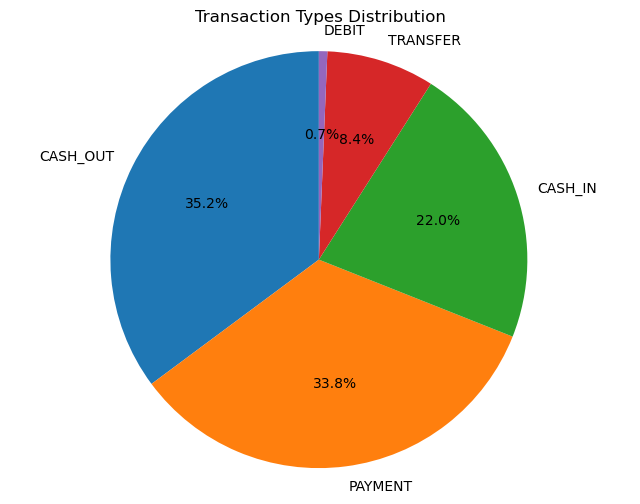

In [12]:
type_value_counts = df['type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(type_value_counts.values, labels=type_value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Transaction Types Distribution')
plt.axis('equal')
plt.show()

Checking The Categories Percentage for Target colummn

In [13]:
froud = df['isFraud'].value_counts()
froud

0    6354407
1       8213
Name: isFraud, dtype: int64

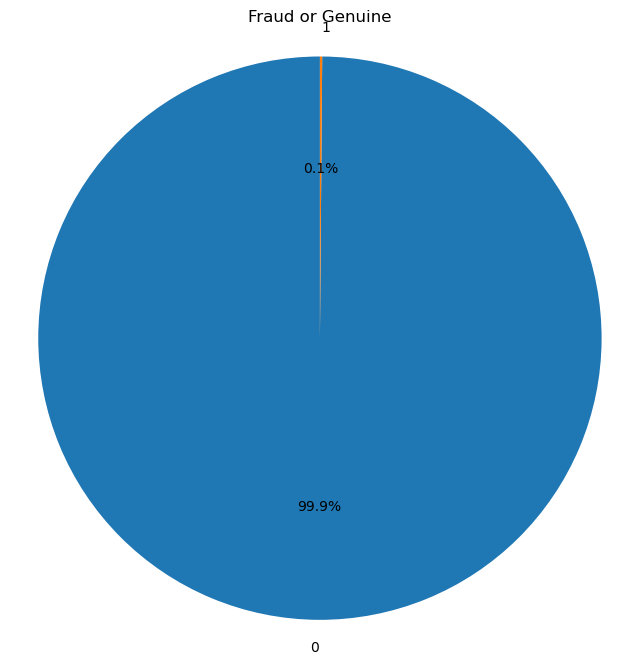

In [14]:
fraud = df['isFraud'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fraud.values, labels=fraud.index, autopct='%1.1f%%', startangle=90)
plt.title('Fraud or Genuine')
plt.axis('equal')
plt.show()

Pieplot shows that almost 99.9% values are not fraud and only 0.1% values are fraud , which is due to the imbalanced dataset 

Counting The Values By Step column

In [15]:
steps = df['step'].value_counts()

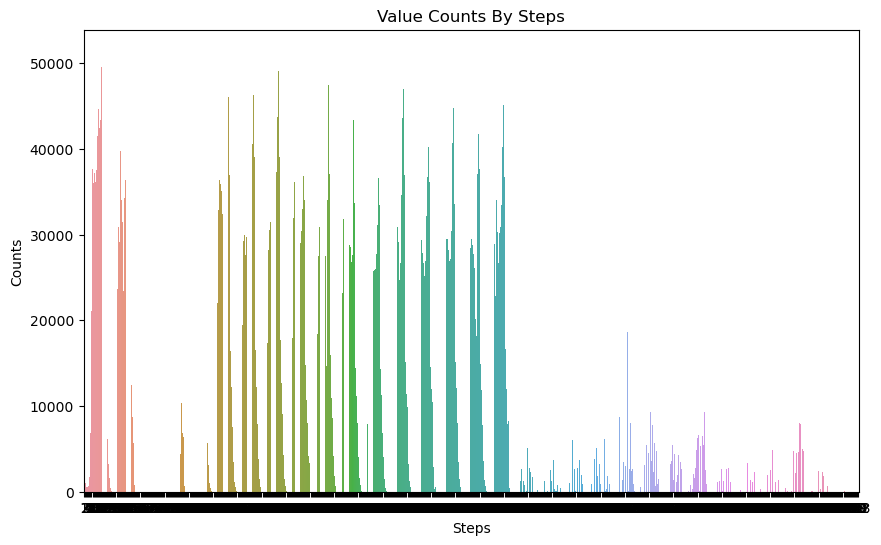

In [16]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x=steps.index, y=steps.values )

plt.title('Value Counts By Steps')
plt.xlabel('Steps')
plt.ylabel('Counts')

plt.show()

we have seen That approximately 150 to 400 in steps covered majority of the datapoints in dataset. 

creating new feature from step column to better understand the transaction happens on which day

In [17]:
df['Day'] = df['step'].apply(lambda x: math.ceil(x / 24))

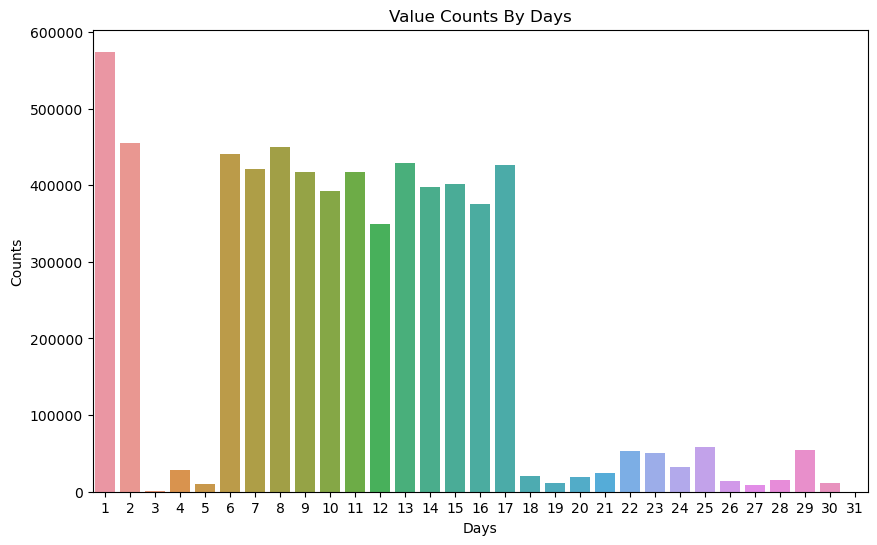

In [18]:
days = df['Day'].value_counts()
plt.figure(figsize=(10, 6))  
sns.barplot(x=days.index, y=days.values)

plt.title('Value Counts By Days')
plt.xlabel('Days')
plt.ylabel('Counts')

# Show plot
plt.show()

Creating two columns from the transaction originator and destination, where the variables "C" represent Customers and "M" represent Merchants, can provide impactful information for detecting fraudulent transactions. This information allows us to track transactions made between customers and merchants, aiding in fraud detection.

In [19]:
df['AccTypeOrig'] = df['nameOrig'].str[0].str.replace('C','customer')
df['AccTypeDest'] = df['nameDest'].str[0].replace({'C':'customer','M':'merchant'})

we have five types of transactions, where fraud occurs in two of them. the first is 'Transfer' and another is 'Cash_out'

We have seen that the number of fraudulent transaction in TRANSFER and CASH_OUT

In [20]:
for category in df['type'].unique():
    print(f"\n{category}\n{df[df['type'] == category]['isFraud'].value_counts()}")


PAYMENT
0    2151495
Name: isFraud, dtype: int64

TRANSFER
0    528812
1      4097
Name: isFraud, dtype: int64

CASH_OUT
0    2233384
1       4116
Name: isFraud, dtype: int64

DEBIT
0    41432
Name: isFraud, dtype: int64

CASH_IN
0    1399284
Name: isFraud, dtype: int64


The 'isFlaggedFraud' is do not correlate with any other variable. this set to be as the transcation amount when greater than 200000 then it gives 1. and it gives almost 16 entries only and all are in transfer column .

In [21]:
for category in df['type'].unique():
    print(f"\n{category}\n{df[df['type'] == category]['isFlaggedFraud'].value_counts()}")


PAYMENT
0    2151495
Name: isFlaggedFraud, dtype: int64

TRANSFER
0    532893
1        16
Name: isFlaggedFraud, dtype: int64

CASH_OUT
0    2237500
Name: isFlaggedFraud, dtype: int64

DEBIT
0    41432
Name: isFlaggedFraud, dtype: int64

CASH_IN
0    1399284
Name: isFlaggedFraud, dtype: int64


new feature with combining two variables Account Type of Originator correspoinding to Destination account type for checking from which type of entity to which type of entity the frodulent transaction made. 

In [22]:
df['TypeTrans'] = df['AccTypeOrig'] + '-' + df['AccTypeDest']

From this Information We Get that There is no Merchants among any originator accounts, merchants are only present in destination accounts for all payments

In [23]:
for category in df['TypeTrans'].unique():
    print(f"\n{category}\n{df[df['TypeTrans'] == category]['isFraud'].value_counts()}")


customer-merchant
0    2151495
Name: isFraud, dtype: int64

customer-customer
0    4202912
1       8213
Name: isFraud, dtype: int64


In [24]:
print('Maximum amount of transaction detected not fraud : ', df[df['isFraud'] == 0]['amount'].max())
print('Average amount of transaction detected not fraud : ',df[df['isFraud'] == 0]['amount'].mean())
print('Minimum amount of transaction detected not fraud : ',df[df['isFraud'] == 0]['amount'].min())

Maximum amount of transaction detected not fraud :  92445516.64
Average amount of transaction detected not fraud :  178197.04172739814
Minimum amount of transaction detected not fraud :  0.01


In [25]:
print('Maximum amount of transaction detected fraud : ', df[df['isFraud'] == 1]['amount'].max())
print('Average amount of transaction detected fraud : ',df[df['isFraud'] == 1]['amount'].mean())
print('Minimum amount of transaction detected fraud : ',df[df['isFraud'] == 1]['amount'].min())

Maximum amount of transaction detected fraud :  10000000.0
Average amount of transaction detected fraud :  1467967.299140387
Minimum amount of transaction detected fraud :  0.0


### Feature Engineering and Transformation 

In [26]:
fraud = df.loc[df['isFraud'] == 1]
nonFraud = df.loc[df['isFraud'] == 0]

print( "percentage of transaction being fraud when old balance of destinatin account and new balance of destination account is 0 : ")
print((len(fraud.loc[(fraud['oldbalanceDest'] == 0) & (fraud['newbalanceDest'] == 0) & (fraud['amount'])]) / (1.0 * len(fraud))))

print( "percentage of transaction being not fraud when old balance of destinatin account and new balance of destination account is 0 : ")
print((len(nonFraud.loc[(nonFraud['oldbalanceDest'] == 0) & (nonFraud['newbalanceDest'] == 0) & (nonFraud['amount'])]) / (1.0 * len(nonFraud))))

percentage of transaction being fraud when old balance of destinatin account and new balance of destination account is 0 : 
0.4955558261293072
percentage of transaction being not fraud when old balance of destinatin account and new balance of destination account is 0 : 
0.36403176567065976


it is seen that, there is almost 50% chance to be a transaction being fraud when old balance of destination account and new balance of destination account is 0

In [27]:
df['error_balance_orig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['error_Balance_Dest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

### Data Cleaning

In [28]:
df.drop(columns = ['nameOrig','nameDest','TypeTrans'],inplace=True)

Drop the Unnesessory factors/features and arange the Dataframe with better order and manner

In [29]:
df = df[['step','type','amount','AccTypeOrig','AccTypeDest','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','error_balance_orig','error_Balance_Dest','isFraud']]

In [30]:
df.head(3)

,step,type,amount,AccTypeOrig,AccTypeDest,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,error_balance_orig,error_Balance_Dest,isFraud
0,1,PAYMENT,9839.64,customer,merchant,170136.0,160296.36,0.0,0.0,0.0,9839.64,0
1,1,PAYMENT,1864.28,customer,merchant,21249.0,19384.72,0.0,0.0,0.0,1864.28,0
2,1,TRANSFER,181.00,customer,customer,181.0,0.00,0.0,0.0,0.0,181.00,1


In [31]:
df['AccTypeOrig'].unique()

array(['customer'], dtype=object)

From above, There are All originator Accounts in transactions are same so we drop the column 

In [32]:
df.drop(columns=['AccTypeOrig'],inplace = True)

In [33]:
df['AccTypeDest'] = df['AccTypeDest'].replace({'customer': 0, 'merchant':1})

In [34]:
df['type'] = df['type'].replace({'TRANSFER':0,'CASH_OUT':1,'DEBIT':2,'PAYMENT':3,'CASH_IN':4})

In [35]:
correlation = df.corr()
correlation

,step,type,amount,AccTypeDest,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,error_balance_orig,error_Balance_Dest,isFraud
step,1.000000,0.005930,0.022373,0.004926,-0.010058,-0.010299,0.027665,0.025888,0.020516,0.028159,0.031578
type,0.005930,1.000000,-0.222793,0.390822,0.347669,0.364625,-0.117899,-0.173067,-0.119523,0.227791,-0.046615
amount,0.022373,-0.222793,1.000000,-0.197444,-0.002762,-0.007861,0.294137,0.459304,0.970660,-0.189928,0.076688
AccTypeDest,0.004926,0.390822,-0.197444,1.000000,-0.189486,-0.193915,-0.231455,-0.238315,-0.229066,-0.068817,-0.025697
oldbalanceOrg,-0.010058,0.347669,-0.002762,-0.189486,1.000000,0.998803,0.066243,0.042029,0.050502,0.156464,0.010154
newbalanceOrig,-0.010299,0.364625,-0.007861,-0.193915,0.998803,1.000000,0.067812,0.041837,0.056897,0.163161,-0.008148
oldbalanceDest,0.027665,-0.117899,0.294137,-0.231455,0.066243,0.067812,1.000000,0.976569,0.304256,-0.025460,-0.005885
newbalanceDest,0.025888,-0.173067,0.459304,-0.238315,0.042029,0.041837,0.976569,1.000000,0.458750,-0.174942,0.000535
error_balance_orig,0.020516,-0.119523,0.970660,-0.229066,0.050502,0.056897,0.304256,0.458750,1.000000,-0.147540,-0.011283
error_Balance_Dest,0.028159,0.227791,-0.189928,-0.068817,0.156464,0.163161,-0.025460,-0.174942,-0.147540,1.000000,0.055120


<AxesSubplot:>

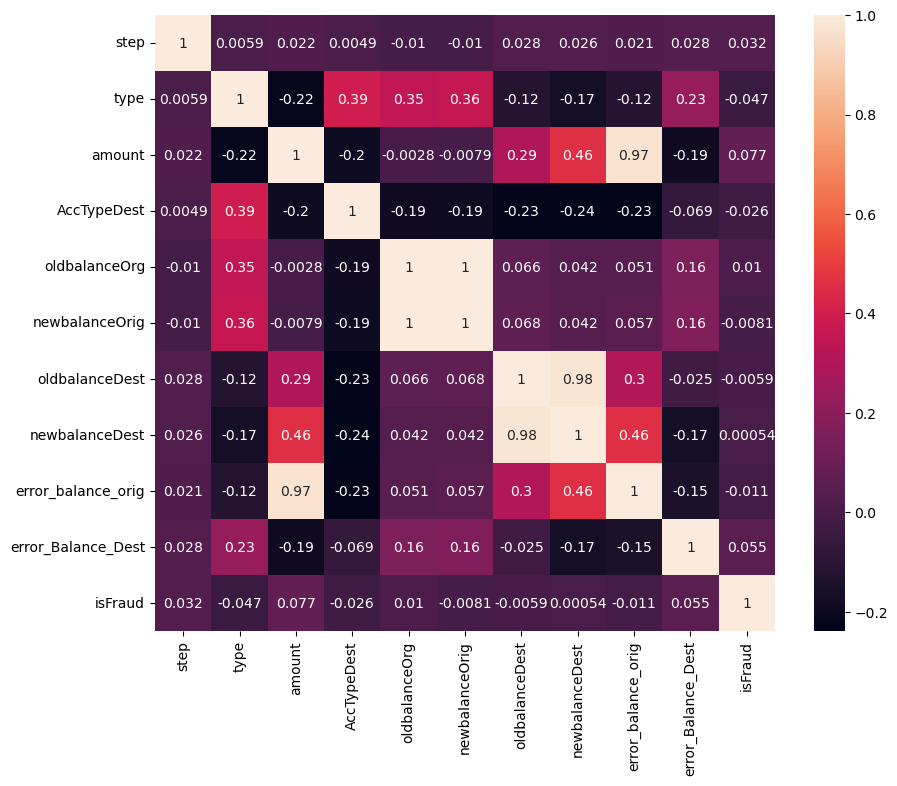

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True)

#### Multicollinearity
Looking at the correlation matrix provided:

High positive correlations:
amount and error_balance_orig: 0.970660

oldbalanceOrg and newbalanceOrig: 0.998803

oldbalanceDest and newbalanceDest: 0.976569

High negative correlations:
There are no high negative correlations in the matrix.
These high correlations indicate potential multicollinearity between these pairs of variables. Specifically:

amount and error_balance_orig have a very high positive correlation, suggesting that they may contain redundant information.
oldbalanceOrg and newbalanceOrig, as well as oldbalanceDest and newbalanceDest, also have very high positive correlations, indicating strong linear relationships between these variables.

On The Basis Of The Transaction Type We Extract The Data Points belogs to methods 'Transfer' and 'Cash_out' which assigned by the values 0 and 1 respectively

In [37]:
new_df = df.loc[(df['type'] == 0) | (df['type'] == 1)].reset_index(drop = True)
new_df

,step,type,amount,AccTypeDest,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,error_balance_orig,error_Balance_Dest,isFraud
0,1,0,181.00,0,181.00,0.0,0.00,0.00,0.00,1.810000e+02,1
1,1,1,181.00,0,181.00,0.0,21182.00,0.00,0.00,2.136300e+04,1
2,1,1,229133.94,0,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05,0
3,1,0,215310.30,0,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05,0
4,1,0,311685.89,0,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,1,339682.13,0,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00,1
2770405,743,0,6311409.28,0,6311409.28,0.0,0.00,0.00,0.00,6.311409e+06,1
2770406,743,1,6311409.28,0,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02,1
2770407,743,0,850002.52,0,850002.52,0.0,0.00,0.00,0.00,8.500025e+05,1


 #### Detecting Outliers

<AxesSubplot:xlabel='amount'>

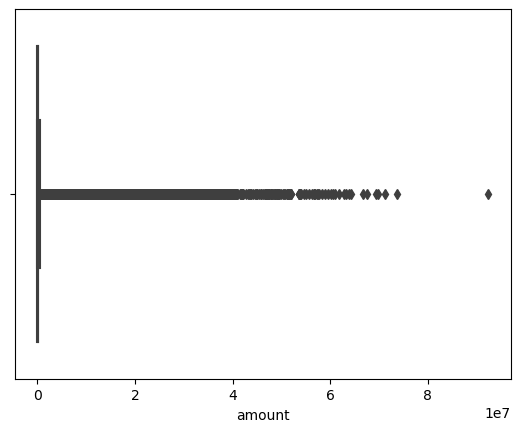

In [38]:
sns.boxplot(df['amount'])

In [39]:
Q1 = new_df['amount'].quantile(0.25)
Q3 = new_df['amount'].quantile(0.75)

Calculate the interquartile range (IQR)

outlier boundaries


In [40]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [41]:
# Filter out the outliers
df_clean = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]


In [42]:
df_clean['isFraud'].value_counts()

0    6130474
1       4770
Name: isFraud, dtype: int64

#### Solution for Multicolinearity And Outliers 

To address multicollinearity and outliers in an imbalanced dataset where removing outliers would significantly reduce the fraud class values, it's essential to leverage algorithms that are robust and less sensitive to outliers. These algorithms can effectively handle the inherent challenges of imbalanced data without compromising the integrity of the dataset.

### Machine Selection 

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Selecting Features and Labels 

In [44]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

Splitting The Data into Training And Testing Data

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Scaling The Data

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Implementing Logistic Regression 

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr_model = LogisticRegression(penalty='l2')

In [50]:
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [51]:
lr_pred = lr_model.predict(X_test_scaled)

In [53]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.90      0.49      0.64      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.75      0.82    554082
weighted avg       1.00      1.00      1.00    554082



In [54]:
confusion_matrix(y_test,lr_pred)

array([[552346,     90],
       [   833,    813]], dtype=int64)

In [55]:
print('F1 score : ',f1_score(y_test,lr_pred))
print('Precision :',precision_score(y_test,lr_pred))

F1 score :  0.6378972145939584
Precision : 0.9003322259136213


Hyperparameter Tuning With The Logistic Regression 

In [56]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 0.01, 0.1, 10],
              'penalty': ['l1', 'l2']}
logistic_model = LogisticRegression(max_iter=10, solver='liblinear')
reg_model = GridSearchCV(logistic_model, param_grid, cv=3, scoring='accuracy')

In [57]:
reg_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [58]:
reg_model.best_estimator_.fit(X_train_scaled,y_train)

LogisticRegression(C=10, max_iter=10, solver='liblinear')

In [59]:
reg_pred = reg_model.best_estimator_.predict(X_test_scaled)

In [60]:
print(classification_report(y_test,reg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.90      0.49      0.64      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.75      0.82    554082
weighted avg       1.00      1.00      1.00    554082



Implementing Decision Tree Algorithm 

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt_model = DecisionTreeClassifier()

In [63]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
dt_pred = dt_model.predict(X_test)

In [65]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.99      0.99      0.99      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



In [66]:
confusion_matrix(y_test,dt_pred)

array([[552425,     11],
       [    11,   1635]], dtype=int64)

Implementing Gradient Boosting Regressor

In [67]:
from xgboost import XGBClassifier

In [68]:
xgb_clf = XGBClassifier()

In [69]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [70]:
xgb_pred = xgb_clf.predict(X_test)

In [71]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082



Hyperparameter Tuning With XGBoost Classifier 

In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [100],
    'max_depth' : [100,200],
    'max_leaves' : [5,10],
    'learning_rate' : [0.01,0.05],
}

xgb_model = GridSearchCV(xgb_clf,param_grid=param_grid,cv=2,scoring='f1',verbose=4)

In [84]:
xgb_model.fit(X_train,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END learning_rate=0.01, max_depth=100, max_leaves=5, n_estimators=100;, score=0.995 total time= 1.7min
[CV 2/2] END learning_rate=0.01, max_depth=100, max_leaves=5, n_estimators=100;, score=0.995 total time= 1.7min
[CV 1/2] END learning_rate=0.01, max_depth=100, max_leaves=10, n_estimators=100;, score=0.995 total time= 1.8min
[CV 2/2] END learning_rate=0.01, max_depth=100, max_leaves=10, n_estimators=100;, score=0.995 total time= 1.7min
[CV 1/2] END learning_rate=0.01, max_depth=200, max_leaves=5, n_estimators=100;, score=0.995 total time= 2.1min
[CV 2/2] END learning_rate=0.01, max_depth=200, max_leaves=5, n_estimators=100;, score=0.995 total time= 1.8min
[CV 1/2] END learning_rate=0.01, max_depth=200, max_leaves=10, n_estimators=100;, score=0.995 total time= 1.9min
[CV 2/2] END learning_rate=0.01, max_depth=200, max_leaves=10, n_estimators=100;, score=0.995 total time= 1.8min
[CV 1/2] END learning_rate=0.05, max_dep

GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [100, 200],
                         'max_leaves': [5, 10], 'n_estimators': [100]},
             scoring='f1', verbose=4)

### Model Traning, Testing And Evaluation 

In [86]:
xgb_model.best_params_

{'learning_rate': 0.05, 'max_depth': 100, 'max_leaves': 5, 'n_estimators': 100}

In [89]:
best_model = xgb_model.best_estimator_

In [91]:
best_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Model Evaluation 

In [140]:
xgb_prediction = best_model.predict(X_test)
xgb_prob = best_model.predict_proba(X_test)


Accuracy Score for the XGB Classifier Model  :  0.9999765377687779

Precision Score for the XGB Classifier Model :  0.999388379204893

Recall Score for the XGB Classifier Model    :  0.9927095990279465

F1 score for the XGB Classifier Model        :  0.9960377933556843

Classification Report                        :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082


confusion Matrix                             :
 [[552435      1]
 [    12   1634]]


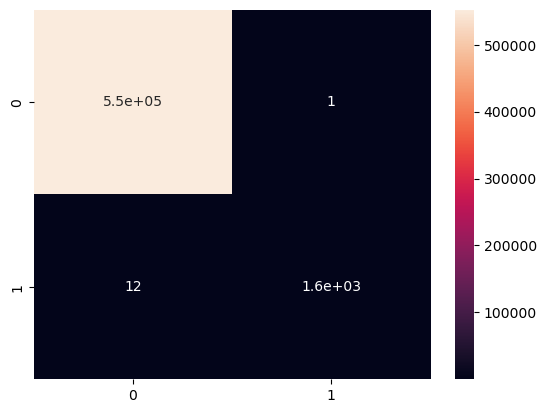

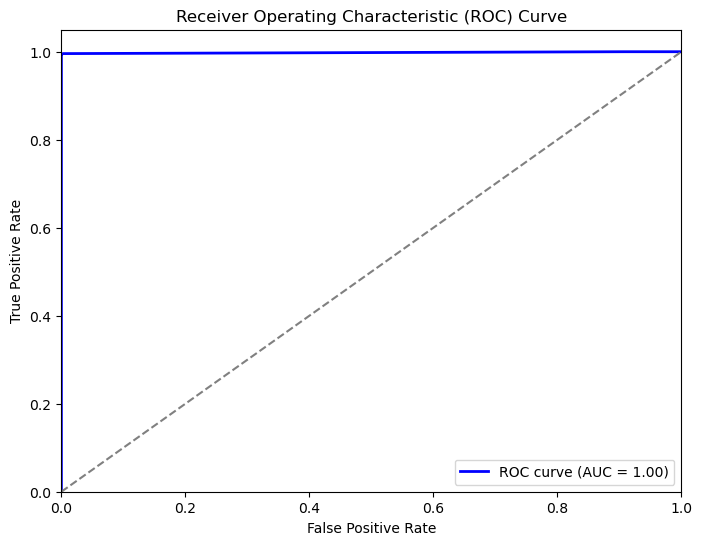

In [154]:
print('\nAccuracy Score for the XGB Classifier Model  : ',accuracy_score(y_test,xgb_prediction))
print('\nPrecision Score for the XGB Classifier Model : ',precision_score(y_test,xgb_prediction))
print('\nRecall Score for the XGB Classifier Model    : ',recall_score(y_test,xgb_prediction))
print('\nF1 score for the XGB Classifier Model        : ',f1_score(y_test,xgb_prediction))
print('\nClassification Report                        :\n', classification_report(y_test,xgb_prediction))
print('\nconfusion Matrix                             :\n',confusion_matrix(y_test,xgb_prediction))

sns.heatmap(confusion_matrix(y_test,xgb_prediction),annot=True)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc = roc_auc_score(y_test, xgb_prob[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

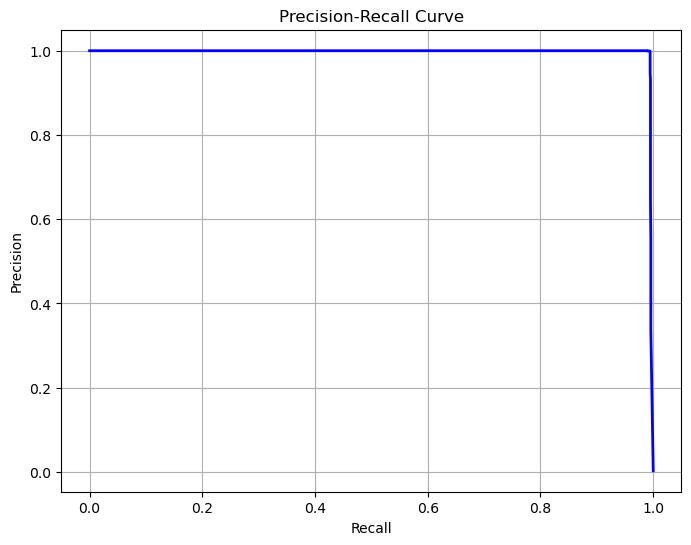

In [151]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_prob[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

XGBoost classifier model appears to perform exceptionally well on the dataset, achieving high accuracy, precision, recall, and F1-score. Here are some key points to highlight model performance:

High Accuracy: The model achieves an accuracy score of approximately 99.99%, indicating that it correctly classifies the vast majority of transactions as either fraudulent or non-fraudulent.

High Precision: The precision score of approximately 99.94% suggests that when the model predicts a transaction as fraudulent, it is correct almost every time. This indicates a low rate of false positives, where legitimate transactions are incorrectly flagged as fraudulent.

High Recall: The recall score of approximately 99.27% indicates that the model captures a high proportion of actual fraudulent transactions. It correctly identifies the vast majority of fraudulent transactions in the dataset.

High F1-score: The F1-score, which is the harmonic mean of precision and recall, is approximately 99.60%. This score balances the trade-off between precision and recall, providing a single metric to evaluate the model's overall performance.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives. In this case, there are very few false positives and false negatives, indicating strong performance.

Imbalance Handling: Since fraud detection often deals with imbalanced datasets (where fraudulent transactions are rare compared to legitimate ones), it's important to ensure that the model performs well on both classes. Your model seems to handle this imbalance effectively, as evidenced by the classification report and confusion matrix.

Overall, XGBoost classifier model demonstrates excellent performance in detecting fraudulent transactions, with high accuracy, precision, recall, and F1-score. These results suggest that the model is well-suited for fraud detection tasks and can effectively distinguish between legitimate and fraudulent transactions.

### Undersampling to Balance the Data

In [122]:
from imblearn.under_sampling import RandomUnderSampler

undersampling_ratio = {0: 8213}  # Set the number of samples for the majority class to be equal to the minority class

rus = RandomUnderSampler(sampling_strategy=undersampling_ratio, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [123]:
print('X resampled shape : ',X_resampled.shape)
print('y resampled shape : ',y_resampled.shape)

X resampled shape :  (16426, 10)
y resampled shape :  (16426,)


In [124]:
y_resampled.value_counts()

0    8213
1    8213
Name: isFraud, dtype: int64

In [125]:
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state = 42)

In [133]:
rf_clf.fit(X_train_resample,y_train_resample)

rf_pred = rf_clf.predict(X_test_resample)
print(classification_report(y_test_resample,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1649
           1       1.00      1.00      1.00      1637

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

parameters = {'n_estimators':[100,200],
    'criterion' : ['gini','entropy'],
    'max_depth' : [100,200,300],
    'min_samples_split' : [5,10,20],
    'min_samples_leaf' : [1, 2, 5],
    'max_leaf_nodes' : [1, 2],
    'bootstrap' : [True],
    'oob_score' : [True],
}

rf_model = GridSearchCV(rf_clf,param_grid=parameters,cv=5,verbose=1)
rf_model.fit(X_train_resample,y_train_resample)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [138]:
print('best parameters : ',rf_model.best_params_)
print('best score      : ',rf_model.best_score_)
rf_classifier = rf_model.best_estimator_

best parameters :  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 200, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200, 'oob_score': True}
best score      :  0.9410958904109588


In [143]:
rf_classifier.fit(X_train_resample,y_train_resample)
rf_prediction_resampled = rf_classifier.predict(X_test_resample)
rf_prob = rf_classifier.predict_proba(X_test_resample)


Accuracy Score for the XGB Classifier Model  :  0.9339622641509434

Precision Score for the XGB Classifier Model :  0.9186320754716981

Recall Score for the XGB Classifier Model    :  0.9517409896151496

F1 score for the XGB Classifier Model        :  0.9348934893489349

Classification Report                        :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      1649
           1       0.92      0.95      0.93      1637

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286


confusion Matrix                             :
 [[1511  138]
 [  79 1558]]


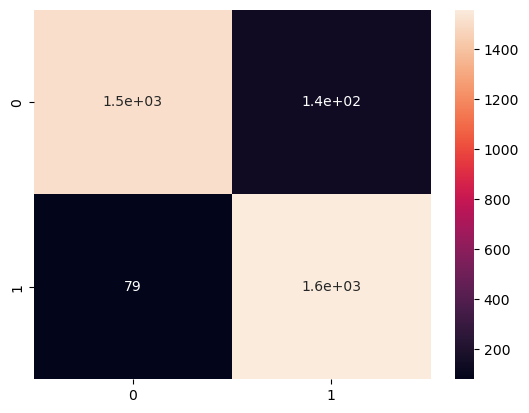

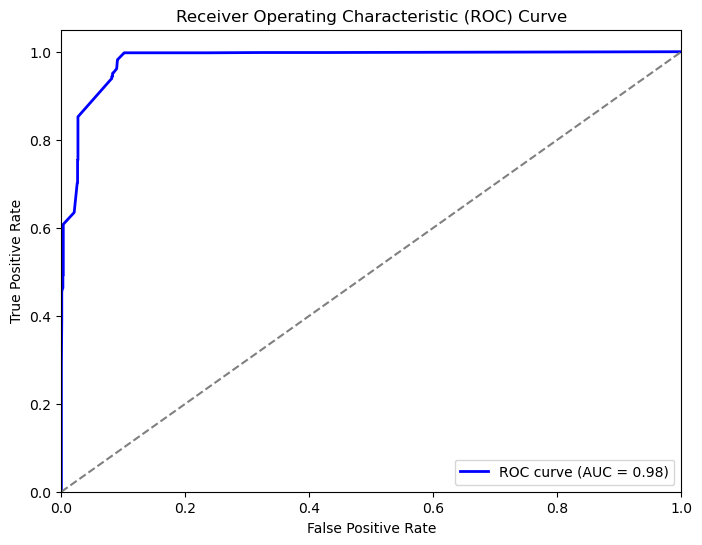

In [155]:
print('\nAccuracy Score for the XGB Classifier Model  : ',accuracy_score(y_test_resample,rf_prediction_resampled))
print('\nPrecision Score for the XGB Classifier Model : ',precision_score(y_test_resample,rf_prediction_resampled))
print('\nRecall Score for the XGB Classifier Model    : ',recall_score(y_test_resample,rf_prediction_resampled))
print('\nF1 score for the XGB Classifier Model        : ',f1_score(y_test_resample,rf_prediction_resampled))
print('\nClassification Report                        :\n', classification_report(y_test_resample,rf_prediction_resampled))
print('\nconfusion Matrix                             :\n',confusion_matrix(y_test_resample,rf_prediction_resampled))

sns.heatmap(confusion_matrix(y_test_resample,rf_prediction_resampled),annot=True)
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
auc = roc_auc_score(y_test_resample, rf_prob[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_resample, rf_prob[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 2. Describe your fraud detection model in elaboration. 

The fraud detection model is designed to accurately identify fraudulent transactions while minimizing false positives and maintaining efficiency in processing large volumes of data. Here's an elaboration of the model:

#### Data Preprocessing:
Impoting Dependencies: 
The model begins by importing essential Python packages, modules, and libraries required for subsequent operations.

Data Analysis: 
A thorough analysis of the dataset is conducted, including an overview of its size, shape, data types, missing values, and duplicate entries. Insights into feature distributions and transaction types are gleaned through exploratory data analysis (EDA).

Missing Value Handling : 
No missing values are observed in the dataset, ensuring data completeness.

Duplicate values : 
Duplicate Values: Duplicate values are absent in the dataset, ensuring data integrity.

Exploratory Data Analysis:
Identifying Unique Categories in Each column. Counting Total number of unique values in each column 
Percentages of the types of transaction in type column features which is the important factor in transactions.

#### Exploratory Data Analysis (EDA):

Identifying Unique Categories: The model identifies unique categories within each column and calculates the total number of unique values in each feature.
Transaction Type Distribution: A detailed examination of transaction types and their percentages provides insights into the dataset's composition.
Data Visualization: Visualization techniques, such as value counts and histograms, are employed to gain further insights into feature categories and distributions.

#### Data Cleaning:
Removing Unnecessary Columns : 
Irrelevant columns are removed to streamline the dataset.
Correlation Matrix : 
Checking Feature Importance and relation using correlation Matrix Taking Relevent Datapoints Raws from observations
Handling Multicollinearity: Address multicollinearity by performing Correlation Matrix techniques identify redundant features.
Feature Engineering: 
Extract relevant features from the dataset, such as transaction amounts, timestamps, account balances, Originator account type, destination account type. and transaction types. Create additional features, such as error_balance_orig and error_balance_dest, to capture inconsistencies in account balances before and after transactions.

#### Model Selection:
Algorithm Selection: Robust algorithms, such as decision trees, random forests, and XGBoost classifiers, are chosen for their resilience to outliers and class imbalance.
Logistic Regression : 
The logistic Regression model not perform well it is biased along with positive class can predict non_fraud class accurately because there is some issue with out data i.e. imbalanced dataset
Tree-based algorithms (e.g., Decision Tree, Random Forest, Gradient Boosting): These algorithms handle non-linear relationships and are robust to outliers.
Decision tree perform well on the data with highest accuracy with precision and f1 score 0.99 for both 
Xgb classifier performs best on the model like decision tree with high accuracy precision recall 
So we select the XGB classifier for our model training testing and evaluation and our work of detection of fraud.
For we that we perform hyperparameter tuning with fewer parameter because of the computational capacity is no sufficient for the size of the data 
Neural Networks: I can’t use this techniques because of the computional resources limitations for the large size of data almost 650K rows datapoints 

#### Model Training:
Training Process: The chosen algorithms are trained on the training dataset while adjusting hyperparameters to achieve optimal performance.
Evaluate model performance using appropriate metrics such as precision, recall, F1-score, and area under the receiver operating characteristic (ROC) curve.

#### Model Evaluation and Validation:
Hyperparameter Tuning: The selected algorithm XGBoost Classifier  is fine-tuned using GridSearchCV and  cross-validation techniques to optimize performance and reduce Overfitting. 
Performance Evaluation: The model's effectiveness is evaluated using metrics such as precision, recall, F1-score, and area under the ROC curve.
Validation: The model's performance is validated on a separate Testing data to ensure its ability to generalize to unseen data.

#### Another Approach:
"We opted to address the class imbalance issue by employing random under sampling, a technique where the majority class instances are randomly subsampled to match the number of instances in the minority class. Following this preprocessing step, we applied the Random Forest Classifier algorithm to the balanced dataset. This approach yielded promising results, demonstrating high accuracy in our classification task."

#### Conclusion:

Overall Assessment: The fraud detection model represents a comprehensive system equipped with advanced techniques in data preprocessing, model selection, training, evaluation, and validation.
Effective Fraud Detection: The model demonstrates high accuracy in identifying fraudulent transactions while minimizing false positives and maintaining operational efficiency.
By following this structured approach, the fraud detection model is poised to effectively combat fraudulent activities while optimizing performance and resource utilization.


### 3. How did you select variables to be included in the model?
Selecting the most impactful variables or features significantly enhances decision-making strategies for fraud detection in customer transactions. The following features have been identified as crucial indicators:

Step (Timestamp): The timestamp of each transaction provides temporal information, allowing for analysis of patterns related to the occurrence of fraudulent transactions over time. Understanding the timing of fraudulent activity aids in developing proactive detection measures.

Amount: Transaction amount plays a pivotal role in distinguishing between fraudulent and genuine transactions. Unusually large or small transaction amounts often signal fraudulent behavior and are thus vital for accurate fraud detection.

Destination Account Type: Differentiating between destination account types, specifically distinguishing between customer-to-customer and customer-to-merchant transactions, is instrumental in identifying potential fraudulent activity. Transactions involving customer accounts, particularly those with other customers or merchants, often exhibit higher risks of fraud.

Balances Variables of Originator and Destination Accounts: Monitoring the balances of both originator and destination accounts before and after transactions provides valuable insight into transaction legitimacy. Discrepancies or abnormalities in account balances can indicate potential fraudulent transactions and are therefore essential features for inclusion in the fraud detection model.

Error Balance Variables: Observing inconsistencies and unverified changes in balances after transactions further strengthens the fraud detection mechanism. Introducing features such as "error_balance_orig" and "error_balance_dest" allows for the identification of transactions exhibiting irregularities in balance changes, thus enhancing the ability to detect fraudulent activities effectively.

By incorporating these key features into the model-building process, financial institutions can improve their fraud detection capabilities and make more informed decisions regarding the authenticity of customer transactions. These features provide valuable insights into transactional behavior and account activity, enabling proactive measures to mitigate the risks associated with fraudulent activities.

### 4. Demonstrate the performance of the model by using best set of tools. 
To demonstrate the performance of the fraud detection model using the best set of tools, i follow these steps:

Selection Evaluation Metrics: Used appropriate evaluation metrics for assessing the model's performance. For fraud detection, common metrics include accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).

Preparing Test Data: Split dataset into training and testing sets. Used the training set to train the model and the testing set to evaluate its performance. Ensured that both sets represent the underlying distribution of fraudulent and non-fraudulent transactions.

Training the Model: Utilizin the best-performing model obtained from experiments. This is a result of hyperparameter tuning or selecting the best-performing algorithm based on cross-validation results.

Evaluation the Model: Applying the trained model to the test data and compute the chosen evaluation metrics. This step provides insights into how well the model generalizes to unseen data and its effectiveness in detecting fraudulent transactions.

Visualizing Results: Visualizing the model's performance using appropriate tools such as confusion matrices, ROC curves, precision-recall curves of predicted probabilities. These visualizations provide a comprehensive understanding of the model's behavior across different thresholds.

Interpretation and Analysis: Interpret the evaluation metrics and visualizations to assess the model's strengths and weaknesses. Identify areas where the model performs well and areas for improvement. This analysis guides further iterations or enhancements to the model.

### 5. What are the key factors that predict the fraudulent customers?
The key factors predicting fraudulent customers, several considerations need to be addressed are following:

Transaction Types:
Analyzing transaction types is crucial, as certain types may exhibit higher rates of fraudulent activity. In many cases, transactions categorized as "TRANSFER" and "CASH_OUT" tend to involve fraudulent behavior. Therefore, focusing on these transaction types could provide valuable insights for identifying fraudulent customers. Other transaction types may not typically exhibit fraudulent patterns, so they may not be as relevant for predictive modeling.

Amounts:
The transaction amount plays a significant role in detecting fraudulent behavior. Unusually large or small transaction amounts may indicate fraudulent activity. Establishing thresholds or ranges for transaction amounts can help flag transactions that deviate from typical patterns, thereby assisting in the identification of potential fraud.

Balances in Originator and Destination Accounts:
Examining the balances in both the originator and destination accounts before and after the transaction provides valuable context for assessing transaction legitimacy. Sudden, substantial changes in account balances following a transaction may raise suspicions of fraudulent activity. Comparing pre- and post-transaction balances allows for the detection of anomalous behavior that may signal fraudulent transactions.

the key factors for predicting fraudulent customers involve analyzing transaction types, amounts, and the pre- and post-transaction balances in originator and destination accounts. By focusing on these factors and incorporating them into predictive modeling techniques, financial institutions can enhance their ability to detect and prevent fraudulent activities effectively.

### 6. Do these factors make sense? If yes, How? If not, How not? 
Yes, these factors do make sense for predicting fraudulent customers. Here's why:

Transaction Types:
Focusing on specific transaction types such as "TRANSFER" and "CASH_OUT" is logical because these types of transactions often involve the movement of funds between accounts, which can be indicative of fraudulent behavior. Fraudsters may exploit these transaction types to transfer funds illicitly or cash out stolen funds, making them key indicators for fraud detection.

Amounts:
Transaction amounts are important because fraudulent transactions often involve unusually large or small amounts compared to legitimate transactions. By setting thresholds or ranges for transaction amounts, financial institutions can flag transactions that fall outside these norms for further investigation. This helps in identifying potential fraudulent activity based on the magnitude of the transaction.

Balances in Originator and Destination Accounts:
Monitoring changes in account balances before and after transactions allows for the detection of suspicious patterns. Fraudulent transactions may result in significant alterations to account balances, such as sudden depletion or substantial increases in funds. By comparing pre- and post-transaction balances, anomalies can be identified, leading to the detection of potential fraud.

In conclusion, these factors make sense for predicting fraudulent customers because they provide valuable insights into transactional behavior and account activity, which are commonly exploited by fraudsters. Analyzing transaction types, amounts, and account balances enables financial institutions to implement effective fraud detection measures and mitigate potential risks associated with fraudulent activities.

### 7. What kind of prevention should be adopted while company update its infrastructure? for decrease in fraudulent transaction and detecting fraudulent transaction


When a company updates its infrastructure, especially in the context of financial transactions, it's crucial to implement robust prevention measures to decrease fraudulent transactions and enhance fraud detection capabilities. Here are some key prevention strategies:

Encryption and Secure Communication: Ensure that all communication channels, including data transmission between systems and with customers, are encrypted using strong cryptographic protocols. This prevents interception and tampering of sensitive information by unauthorized parties.

Multi-Factor Authentication (MFA): Implement MFA for user authentication, requiring users to provide multiple forms of verification such as passwords, biometrics, or security tokens. This adds an extra layer of security and makes it harder for fraudsters to gain unauthorized access to accounts or systems.

Real-Time Monitoring and Alerts: Utilize advanced monitoring systems to track transactions in real-time and set up alerts for suspicious activities, such as large or unusual transactions, multiple failed login attempts, or deviations from typical customer behavior. Prompt notification of potential fraud enables immediate action to mitigate risks.

Machine Learning and AI-Based Fraud Detection: Deploy machine learning and artificial intelligence algorithms to analyze transaction data and identify patterns indicative of fraudulent behavior. These advanced analytics can detect anomalies, detect emerging fraud trends, and adapt to evolving fraud tactics more effectively than traditional rule-based systems.

Regular Security Audits and Penetration Testing: Conduct regular security audits and penetration testing to identify vulnerabilities in the updated infrastructure. Address any weaknesses promptly and continuously assess the effectiveness of security controls to stay ahead of potential threats.

Employee Training and Awareness Programs: Educate employees about the latest fraud schemes, cybersecurity best practices, and the importance of adhering to security protocols. Training programs should emphasize the role of employees in detecting and reporting suspicious activities to prevent fraud incidents.


By implementing these prevention measures while updating its infrastructure, a company can significantly reduce the occurrence of fraudulent transactions and enhance its ability to detect and respond to fraud incidents effectively. These proactive steps help safeguard customer assets, preserve trust in the company's brand, and mitigate financial losses associated with fraudulent activities.

### 8. Assuming these actions have been implemented, how would you determine if they work?

Determining the effectiveness of the implemented fraud prevention measures involves ongoing monitoring, evaluation, and analysis of various performance indicators. Here's how you can assess whether the actions are working:

Reduction in Fraudulent Transactions: Compare the number and value of fraudulent transactions before and after implementing the prevention measures. A decrease in fraudulent activity indicates that the measures are effective in deterring or detecting fraudulent behavior.

False Positive Rates: Evaluate the rate of false positives, i.e., legitimate transactions incorrectly flagged as fraudulent. A decrease in false positives suggests that the prevention measures are accurately targeting suspicious activities without inconveniencing genuine customers.

Detection Time: Measure the time it takes to detect and respond to fraudulent transactions. Shorter detection times indicate improved efficiency in identifying and mitigating fraud, minimizing the impact on customers and reducing potential losses.

Customer Feedback: Gather feedback from customers regarding their experience with the updated security measures. Assess whether customers perceive the measures as effective, user-friendly, and non-intrusive. Positive feedback indicates that the measures strike a balance between security and convenience.

Financial Impact: Analyze the financial impact of fraud prevention efforts, considering factors such as fraud-related losses, cost savings from fraud prevention, and revenue retention due to enhanced customer trust. A positive return on investment (ROI) suggests that the prevention measures are effective in protecting the company's assets and preserving its reputation.

Compliance Adherence: Ensure ongoing compliance with regulatory requirements and industry standards for fraud prevention. Regular audits and assessments can verify that the implemented measures align with applicable laws and regulations, reducing legal and compliance risks.

Benchmarking Against Industry Standards: Compare the company's fraud prevention performance metrics against industry benchmarks and best practices. Benchmarking helps identify areas for improvement and ensures that the company remains competitive in its fraud prevention efforts.

Adaptation to Emerging Threats: Assess the ability of the prevention measures to adapt to evolving fraud tactics and emerging threats. Regular updates and enhancements to security protocols, algorithms, and detection mechanisms demonstrate the company's agility in responding to changing fraud landscape.

By monitoring these key performance indicators and regularly evaluating the effectiveness of fraud prevention measures, companies can continuously optimize their strategies to stay ahead of fraudsters and safeguard their assets and reputation.